
Ce notebook implémente un Réseau de Neurones Convolutif (CNN) pour la classification de chiffres manuscrits en utilisant le dataset MNIST.



In [ ]:
#  Import des bibliothèques nécessaires
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D

Image d'entrée aléatoire:
[[[0.88854024 0.49409782 0.54278697]
  [0.99671895 0.15244932 0.54495111]
  [0.59597064 0.66396609 0.32869652]
  [0.36584055 0.16867038 0.75470622]
  [0.62361154 0.86960555 0.91817426]]

 [[0.52195132 0.9982074  0.70613746]
  [0.40038853 0.00772789 0.66849964]
  [0.97572635 0.81716805 0.48981304]
  [0.43770393 0.92936688 0.17267983]
  [0.52654027 0.81031513 0.51188532]]

 [[0.82893265 0.8297313  0.87413886]
  [0.72597115 0.84988778 0.40202731]
  [0.37651667 0.79336569 0.58319015]
  [0.34164254 0.8911386  0.61124185]
  [0.47533092 0.31106063 0.75965304]]

 [[0.94881376 0.02699626 0.21885647]
  [0.85036779 0.44541623 0.15298338]
  [0.05334444 0.15962615 0.4453609 ]
  [0.02771966 0.42968014 0.73094257]
  [0.84137671 0.35873702 0.70654103]]

 [[0.39590594 0.8108785  0.9661732 ]
  [0.96632025 0.73428638 0.25767999]
  [0.58463466 0.8749971  0.84186317]
  [0.18976388 0.15482417 0.04885933]
  [0.93160433 0.25297012 0.75900155]]]


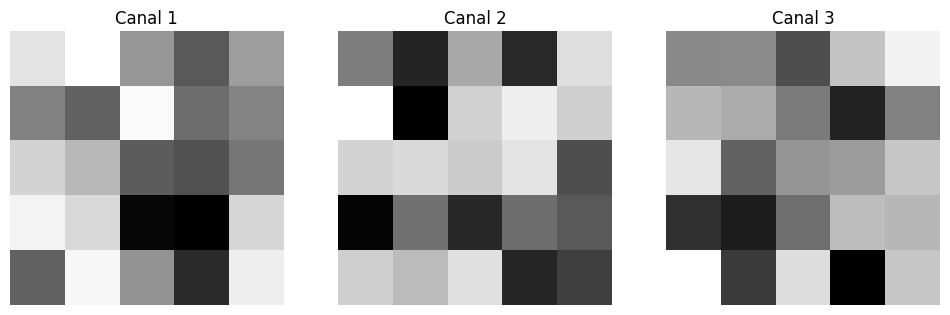

In [ ]:
# Créer une image d'entrée aléatoire 5x5x3
image_input = np.random.random((1, 5, 5, 3))
print("Image d'entrée aléatoire:")
print(image_input[0])

# Visualisation de l'image d'entrée
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Affichage par canal (RGB)
for i in range(3):
    ax[i].imshow(image_input[0, :, :, i], cmap='gray')
    ax[i].set_title(f'Canal {i+1}')
    ax[i].axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Filtres de la couche de convolution (2 filtres 3x3):
(3, 3, 3, 2)
[[[[ 0.32910013  0.2549389 ]
   [ 0.35602665 -0.05337352]
   [ 0.259183   -0.24326694]]

  [[-0.22742681 -0.3128379 ]
   [ 0.04058084  0.20282322]
   [ 0.36231375 -0.36181247]]

  [[-0.22110717 -0.09569868]
   [-0.11999731 -0.00487718]
   [ 0.32220268 -0.29738492]]]


 [[[-0.08933178  0.1792497 ]
   [-0.11798757 -0.08717126]
   [-0.06614992  0.36361778]]

  [[ 0.31434733  0.2348026 ]
   [-0.03979263  0.26030302]
   [ 0.25774473  0.00796077]]

  [[ 0.18453717 -0.25885576]
   [-0.22306615 -0.04598612]
   [ 0.13430792  0.32407957]]]


 [[[-0.3590085  -0.24090758]
   [ 0.20311183  0.09718171]
   [ 0.06700632  0.21380222]]

  [[-0.32848227 -0.35873112]
   [-0.15647858 -0.16672489]
   [-0.09959513 -0.35618275]]

  [[ 0.18760163 -0.01105282]
   [ 0.10821772  0.0174481 ]
   [-0.1955979  -0.2932702 ]]]]


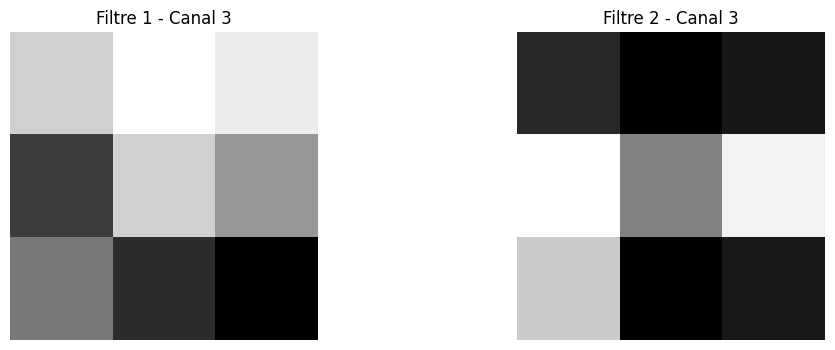

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Définir le modèle avec une seule couche de convolution
from tensorflow.keras.layers import MaxPool2D

model = Sequential()
model.add(Conv2D(2, (3, 3), input_shape=(5, 5, 3), strides = 2, use_bias= True,padding = 'same') )



# Appliquer la couche de convolution sur l'image d'entrée
output = model.predict(image_input)

# Affichage des filtres utilisés dans la couche de convolution
filters = model.layers[0].get_weights()[0]  # Récupérer les poids (filtres)

print("Filtres de la couche de convolution (2 filtres 3x3):")
print(filters.shape)  # Affiche la forme des filtres: (hauteur, largeur, canaux d'entrée, canaux de sortie)
print(filters)  # Afficher les poids des filtres

# Visualisation des filtres
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    for j in range(3):  # Affichage par canal (RGB)
        ax[i].imshow(filters[:, :, j, i], cmap='gray')
        ax[i].set_title(f'Filtre {i+1} - Canal {j+1}')
        ax[i].axis('off')

plt.show()
# the model summary
model.summary()

Sortie de la convolution (features maps):
(1, 3, 3, 2)


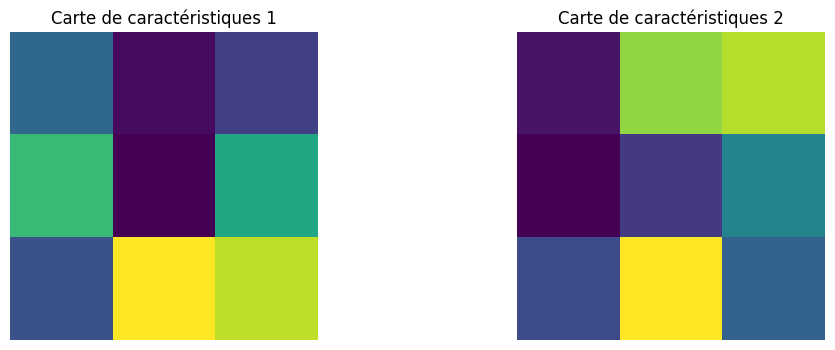

In [ ]:
#Visualisation  de la sortie
print("Sortie de la convolution (features maps):")
print(output.shape)  # Affiche la forme de l'output: (nombre d'images, hauteur, largeur, canaux de sortie)

# Visualisation des sorties (2 cartes de caractéristiques)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].imshow(output[0, :, :, i], cmap='viridis')
    ax[i].set_title(f'Carte de caractéristiques {i+1}')
    ax[i].axis('off')

plt.show()


Ajout du max-pooling

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filtres de la couche de convolution (2 filtres 3x3):
(3, 3, 3, 2)
[[[[-0.17262483  0.07439658]
   [-0.23445432 -0.26353496]
   [-0.2601046  -0.03306147]]

  [[-0.18465436  0.10843006]
   [-0.30573317  0.14863569]
   [-0.03848597 -0.1562101 ]]

  [[ 0.20689058  0.3621062 ]
   [ 0.30161226 -0.10898367]
   [ 0.32634205 -0.26754606]]]


 [[[-0.3360901  -0.08934256]
   [ 0.32999498 -0.05826646]
   [-0.07124978 -0.00062585]]

  [[ 0.28027076 -0.10937959]
   [ 0.07141721  0.06083989]
   [ 0.07148162  0.16454679]]

  [[ 0.13799065  0.07808262]
   [ 0.22460586  0.01147044]
   [ 0.20871592 -0.21441352]]]


 [[[ 0.18752265  0.21584946]
   [ 0.27635342 -0.2929285 ]
   [ 0.05253264  0.15227175]]

  [[-0.30412227  0.16832083]
   [-0.22798632  0.15760201]
   [ 0.04285228  0.2198767 ]]

  [[-0.12634541 -0.08273867]
   [ 0.17627579 -0.3602375 ]
   [ 0.28941917  0.24498445]]]]


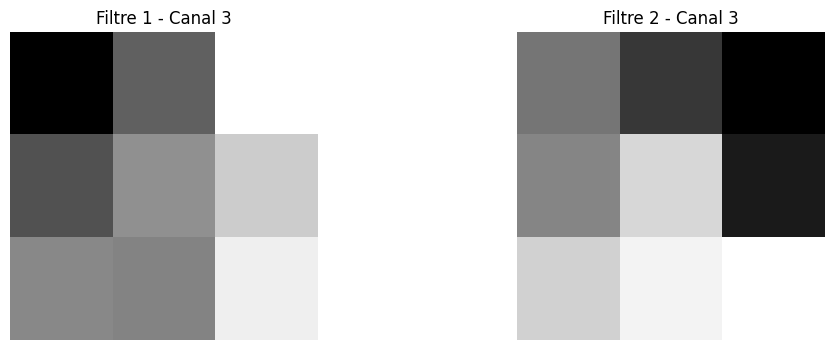

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 2)        │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Définir le modèle avec une seule couche de convolution
from tensorflow.keras.layers import MaxPool2D

model = Sequential()
model.add(Conv2D(2, (3, 3), input_shape=(5, 5, 3), strides = 2, use_bias= True,padding = 'same') )# Add Max Pooling layer
model.add(MaxPool2D(pool_size=(3, 3)))

# Appliquer la couche de convolution sur l'image d'entrée
output = model.predict(image_input)

# Affichage des filtres utilisés dans la couche de convolution
filters = model.layers[0].get_weights()[0]  # Récupérer les poids (filtres)

print("Filtres de la couche de convolution (2 filtres 3x3):")
print(filters.shape)  # Affiche la forme des filtres: (hauteur, largeur, canaux d'entrée, canaux de sortie)
print(filters)  # Afficher les poids des filtres

# Visualisation des filtres
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    for j in range(3):  # Affichage par canal (RGB)
        ax[i].imshow(filters[:, :, j, i], cmap='gray')
        ax[i].set_title(f'Filtre {i+1} - Canal {j+1}')
        ax[i].axis('off')

plt.show()
# the model summary
model.summary()

Sortie de la convolution (features maps):
(1, 1, 1, 2)
[[[[0.86097157 0.51321524]]]]


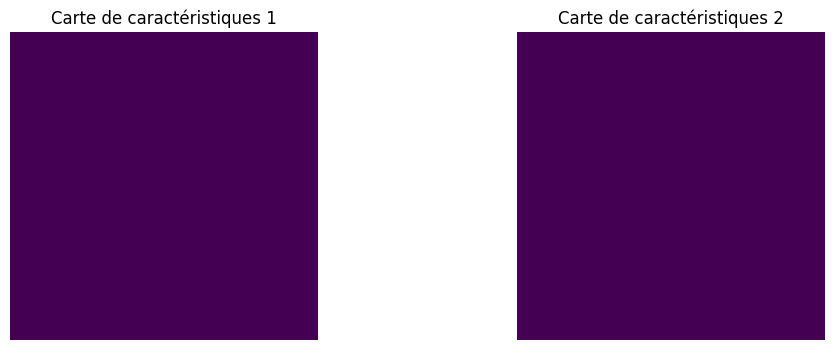

In [ ]:
#Visualisation  de la sortie
print("Sortie de la convolution (features maps):")
print(output.shape)  # Affiche la forme de l'output: (nombre d'images, hauteur, largeur, canaux de sortie)
print (output)

# Visualisation des sorties (2 cartes de caractéristiques)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].imshow(output[0, :, :, i], cmap='viridis')
    ax[i].set_title(f'Carte de caractéristiques {i+1}')
    ax[i].axis('off')

plt.show()


digit mnist dataset

In [ ]:
pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=22ac1dee7c3fd0f3e396fd400bda38bcdaf64f5d7cebe00783ae41612cd24c33
  Stored in directory: /root/.cache/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Load MNIST from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape + normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Verify
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
# Définition du modèle
model = models.Sequential()

# Première couche convolutionnelle
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(28,28,1),
    name='conv1'
))


model.add(layers.MaxPooling2D(pool_size=(2,2), name='pool1'))
# Deuxième couche convolutionnelle
model.add(layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    name='conv2'

))


model.add(layers.MaxPooling2D(pool_size=(2,2), name='pool2'))
# Flatten : passage des données 2D → 1D
model.add(layers.Flatten(name='flatten'))

# Couche dense cachée
model.add(layers.Dense(
    units=64,              # 64 neurones
    activation='relu',
    name='dense1'
))

# Couche de sortie (10 classes)
model.add(layers.Dense(
    units=10,              # chiffres 0 à 9
    activation='softmax',   # sortie probabiliste
    name='output'
))

#  Compilation du modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Affichage du résumé du modèle
model.summary()

# Print trainable variables to help diagnose the error
print("Trainable variables:")
for var in model.trainable_variables:
    print(f"- {var.name}: {var.shape}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Trainable variables:
- kernel: (3, 3, 1, 32)
- bias: (32,)
- kernel: (3, 3, 32, 64)
- bias: (64,)
- kernel: (1600, 64)
- bias: (64,)
- kernel: (64, 10)
- bias: (10,)
